<a href="https://colab.research.google.com/github/HARSHAZGREAT/Databytetast1/blob/main/farepred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [377]:
import pandas as pd
import numpy as np
import csv
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim

In [378]:
drive.mount("/content/gdrive",  force_remount=True)
train_path = '/content/gdrive/My Drive/ML datasets/Fare_data/Train_fare.xlsx'
test_path = '/content/gdrive/My Drive/ML datasets/Fare_data/test_fare.xlsx'
os.listdir('/content/gdrive/My Drive/ML datasets/Fare_data/')

df1 = pd.read_excel(train_path)
df2 = pd.read_excel(test_path)

Mounted at /content/gdrive


In [379]:
df1.head(3)

,trip_duration,distance_traveled,distance_traveled.1,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,771,2.87,2.75,1,75.00,24,6.300,105.300,0
1,1210,3.55,3.43,1,105.00,24,13.200,142.200,0
2,753,3.24,3.12,1,71.25,0,26.625,97.875,1


to check if there are empty cells in the given data

In [380]:
df1.isnull().sum()

trip_duration          0
distance_traveled      0
distance_traveled.1    0
num_of_passengers      0
fare                   0
tip                    0
miscellaneous_fees     0
total_fare             0
surge_applied          0
dtype: int64

Now to visualise the given data

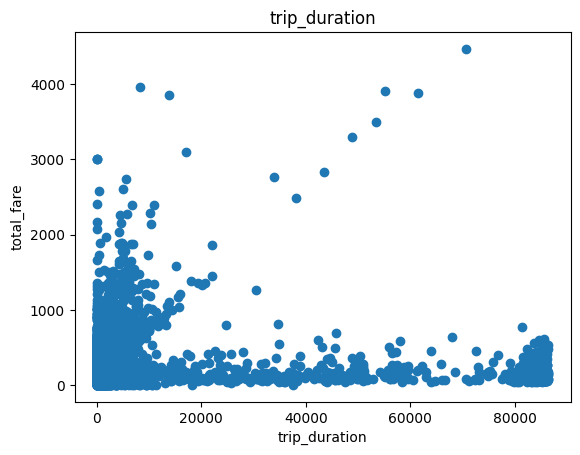

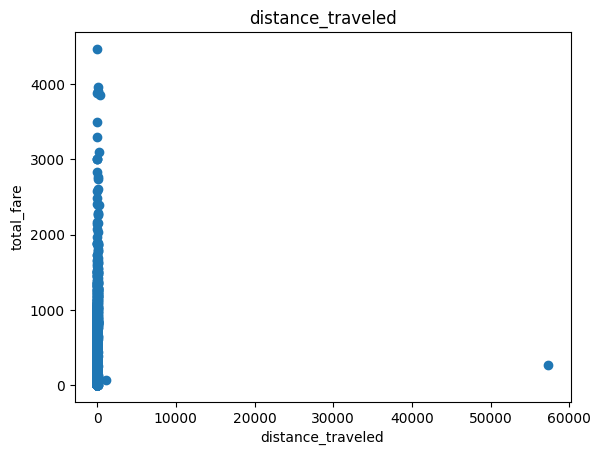

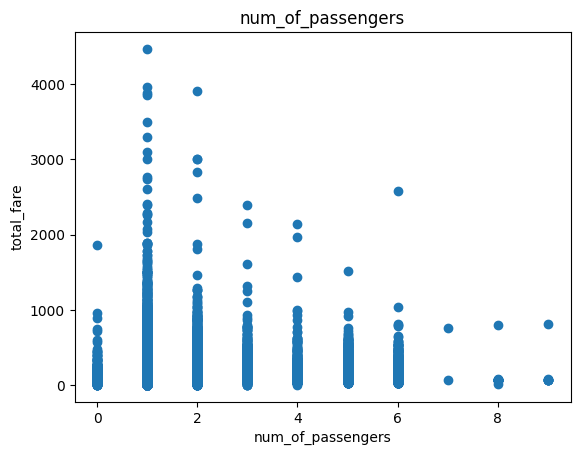

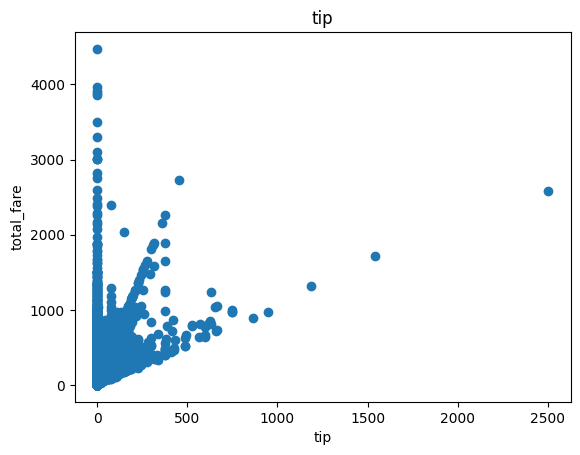

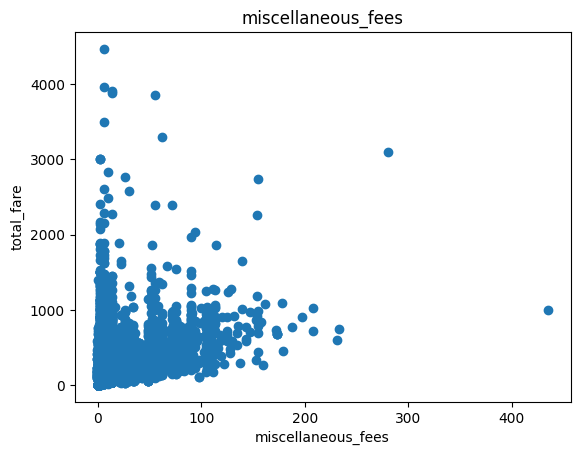

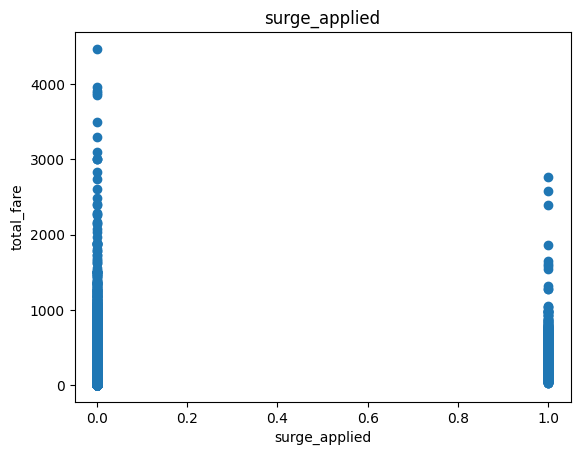

In [381]:
id_X = ['trip_duration', 'distance_traveled', 'num_of_passengers', 'tip', 'miscellaneous_fees', 'surge_applied']
for label in id_X:
  plt.scatter(df1[label], df1["total_fare"])
  plt.title(label)
  plt.ylabel("total_fare")
  plt.xlabel(label)
  plt.show()

To remove data in which distance is more than 1000 km and less than 10 km and time is more than 10 hr (36000 mins)

In [382]:
df1 = df1[df1['distance_traveled'] < 1000]
df1 = df1[df1['distance_traveled'] > 10]
df1 = df1[df1['trip_duration'] < 36000]

In [383]:
df1.describe()

,trip_duration,distance_traveled,distance_traveled.1,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
count,22727.000000,22727.000000,22727.000000,22727.000000,22727.000000,22727.000000,22727.000000,22727.000000,22727.000000
mean,2094.203282,15.816741,15.696741,1.312668,252.622523,28.369824,25.947996,306.940343,0.426629
std,1484.811599,7.875149,7.875149,0.906968,135.661249,36.311454,21.661049,150.637156,0.494598
min,24.000000,10.020000,9.900000,0.000000,0.000000,0.000000,-0.500000,0.000000,0.000000
25%,1331.000000,11.430000,11.310000,1.000000,180.000000,0.000000,6.450000,227.250000,0.000000
50%,1759.000000,13.320000,13.200000,1.000000,213.750000,20.000000,26.500000,270.375000,0.000000
75%,2420.000000,17.240000,17.120000,1.000000,281.250000,48.000000,30.875000,339.825000,1.000000
max,34732.000000,315.370000,315.250000,9.000000,3963.750000,750.000000,435.000000,3969.750000,1.000000


In [384]:
train = df1.copy()
test = df2.copy()

Now lets starttttt

In [385]:
train_id_X = ['trip_duration','distance_traveled','num_of_passengers','tip','miscellaneous_fees','surge_applied']
train_id_Y = ['fare','total_fare']

train_X = train.loc[:, train_id_X]
train_Y = train.loc[:, train_id_Y]

train_X = pd.DataFrame(train_X)
train_Y = pd.DataFrame(train_Y)

test_X = test.loc[:, train_id_X]

For pytorch implementation

In [386]:
X = torch.tensor(train_X.values, dtype=torch.float32)
Y = torch.tensor(train_Y.values, dtype=torch.float32)
test_X = torch.tensor(test_X.values, dtype=torch.float32)

scaler_X = StandardScaler()
scaler_X.fit(X)

scaler_Y = StandardScaler()
scaler_Y.fit(Y)

normalised_X = scaler_X.transform(X.numpy())
normalised_Y = scaler_Y.transform(Y.numpy())
testnormalised_X = scaler_X.transform(test_X.numpy())

normalised_X = torch.tensor(normalised_X, dtype=torch.float32)
normalised_Y = torch.tensor(normalised_Y, dtype=torch.float32)
testnormalised_X = torch.tensor(testnormalised_X, dtype=torch.float32)

To create a PyTorch linear regression model with 6 input features and 2 targets

In [387]:
class LinearRegressionModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        return self.linear(x)

model = LinearRegressionModel(input_size=6, output_size=2)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.0005)

To train the model

Epoch [500/18000], Loss: 0.6172
Epoch [1000/18000], Loss: 0.4771
Epoch [1500/18000], Loss: 0.4024
Epoch [2000/18000], Loss: 0.3610
Epoch [2500/18000], Loss: 0.3371
Epoch [3000/18000], Loss: 0.3227
Epoch [3500/18000], Loss: 0.3136
Epoch [4000/18000], Loss: 0.3078
Epoch [4500/18000], Loss: 0.3039
Epoch [5000/18000], Loss: 0.3013
Epoch [5500/18000], Loss: 0.2995
Epoch [6000/18000], Loss: 0.2982
Epoch [6500/18000], Loss: 0.2973
Epoch [7000/18000], Loss: 0.2966
Epoch [7500/18000], Loss: 0.2962
Epoch [8000/18000], Loss: 0.2958
Epoch [8500/18000], Loss: 0.2956
Epoch [9000/18000], Loss: 0.2954
Epoch [9500/18000], Loss: 0.2953
Epoch [10000/18000], Loss: 0.2952
Epoch [10500/18000], Loss: 0.2951
Epoch [11000/18000], Loss: 0.2950
Epoch [11500/18000], Loss: 0.2950
Epoch [12000/18000], Loss: 0.2950
Epoch [12500/18000], Loss: 0.2949
Epoch [13000/18000], Loss: 0.2949
Epoch [13500/18000], Loss: 0.2949
Epoch [14000/18000], Loss: 0.2949
Epoch [14500/18000], Loss: 0.2949
Epoch [15000/18000], Loss: 0.2949


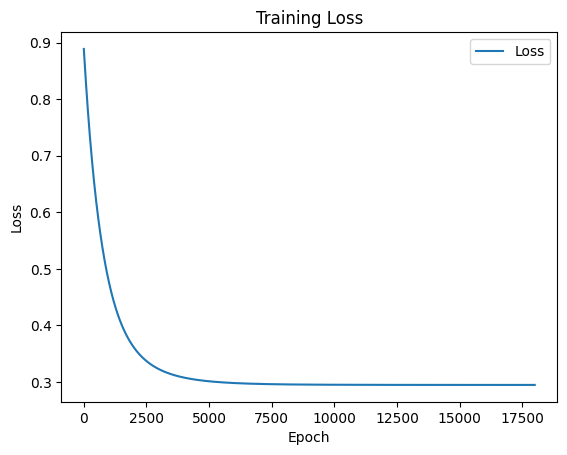

In [388]:
epochs = []
loss_values = []

num_epochs = 18000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(normalised_X)
    loss = criterion(outputs, normalised_Y)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    epochs.append(epoch)
    loss_values.append(loss.item())

    if (epoch + 1) % 500 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

plt.plot(epochs, loss_values, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.show()

To test modellll!!

In [389]:
with torch.no_grad():
    predicted_Y = model(testnormalised_X)

predicted_Y = predicted_Y.numpy() if isinstance(predicted_Y, torch.Tensor) else predicted_Y

pred_Y = scaler_Y.inverse_transform(predicted_Y)
pred_Y = torch.tensor(pred_Y, dtype=torch.float32)
predY_data = pred_Y.numpy()

df_finale = pd.DataFrame(data=predY_data, columns=['fare', 'total_fare'])

df_finale.head()

,fare,total_fare
0,90.286812,103.470772
1,52.557537,65.765831
2,92.761955,122.459068
3,75.172890,95.524269
4,79.558434,81.647636
